<a href="https://colab.research.google.com/github/abnd-me/Public/blob/main/ABHINAND_P_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans Clustering

In [1]:
#Load Dataset

import pandas as pd
df = pd.read_excel('/content/iris.xls')

#Display
df.head(10)


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
#Pre-processing

df.fillna(df.mean(), inplace=True) #Handel Missing value

from sklearn.preprocessing import MinMaxScaler #Scale the data
scaler = MinMaxScaler()

numerical_columns = ['SL', 'SW', 'PL', 'PW']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


<ipython-input-2-ce105e60b75c>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True) #Handel Missing value


In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.432207,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [4]:
#Apply KMeans Algorithm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt


X = df[numerical_columns]

K_range = range(1,11)
inertia_values = []


for K in K_range:
  kmeans = KMeans(n_clusters=K, random_state=0)
  kmeans.fit(X)
  inertia = kmeans.inertia_
  inertia_values.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

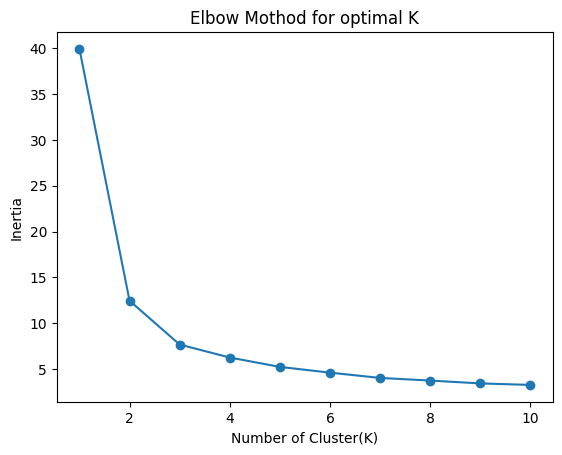

In [5]:
# Plot for elbow method to find optimal value of K

plt.plot(K_range , inertia_values, marker='o')
plt.title('Elbow Mothod for optimal K')
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Optimal value for K is 3

In [7]:
#Calculate silhouette score

silavg = silhouette_score(X, kmeans.labels_)

print("Silhoutte Score", silavg)

Silhoutte Score 0.3110177031926713


##Agglomerative Clusting

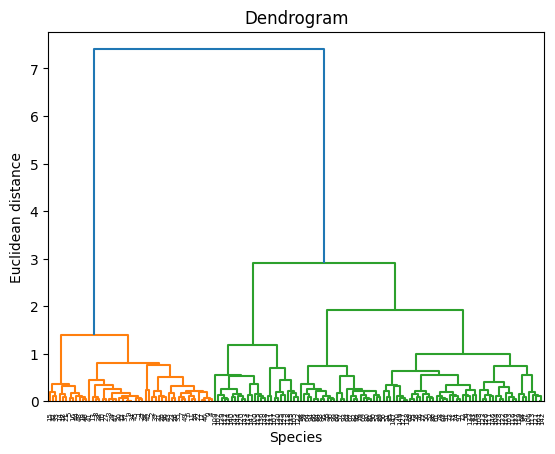

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendorogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distance')
plt.show()

In [9]:
#Apply Agglomerative Clusting

from sklearn.cluster import AgglomerativeClustering

Agg = AgglomerativeClustering(n_clusters=5 , affinity = 'euclidean' , linkage='ward')
Clust = Agg.fit_predict(X)
Clust

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

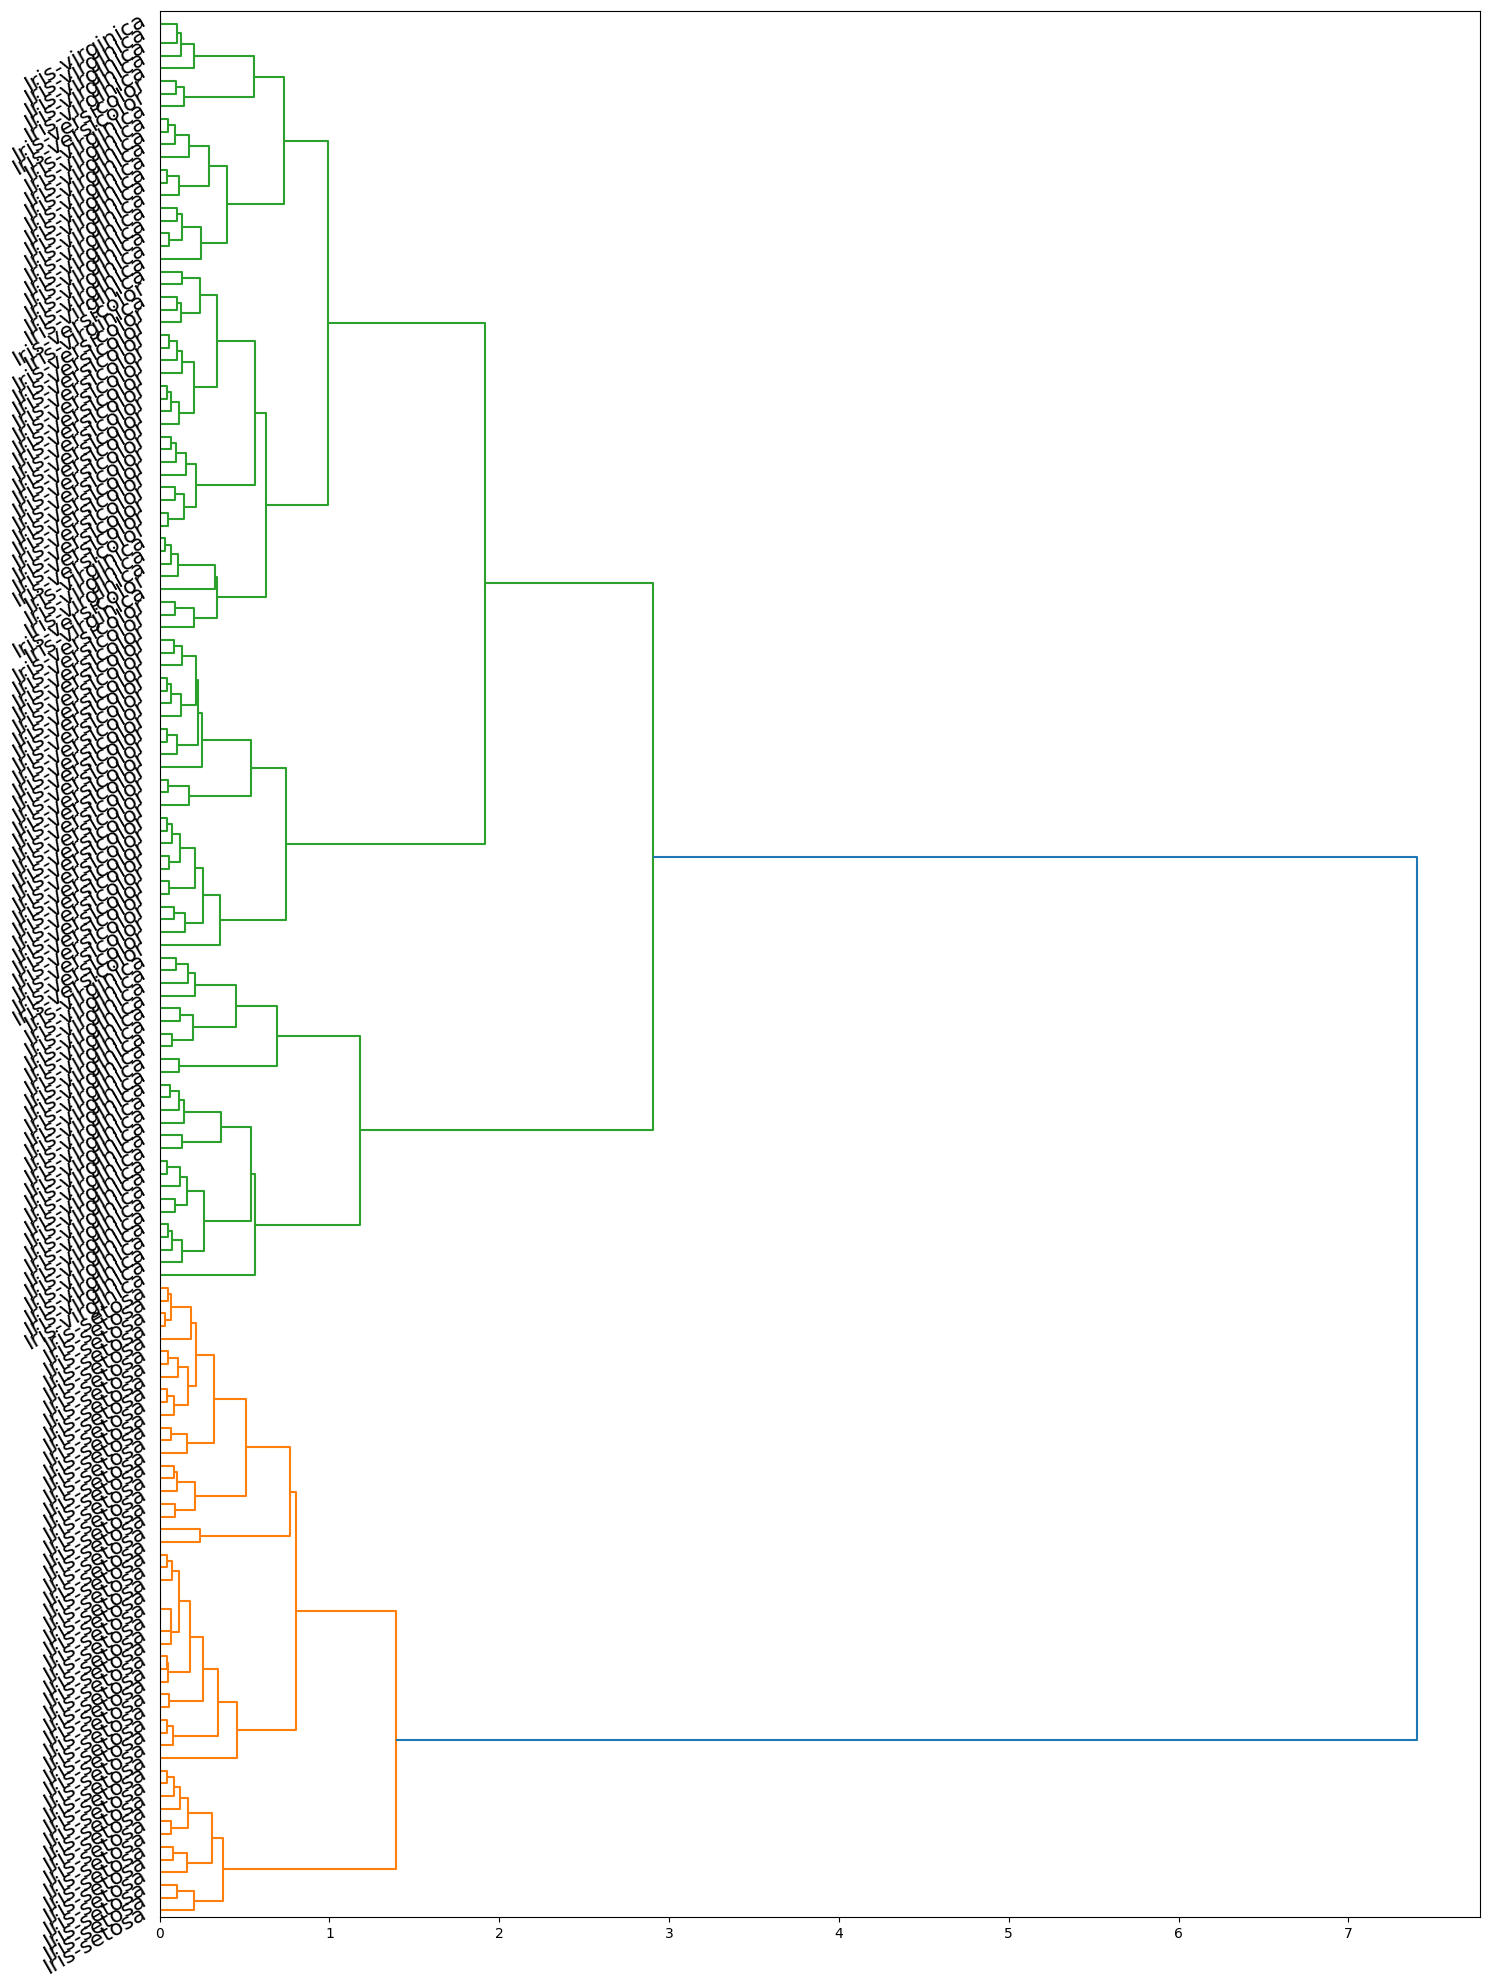

In [10]:
#Plot Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

Z=linkage(X,method="ward")

ffig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(df['Classification']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()